In [42]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
#plt.style.use('../../style_Matplotlib_charts.mplstyle')
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
import pickle

In [43]:
training_data = pd.read_csv('training_data.csv')

x_name = ['date_scaled']
y_name = 'rb_win_rate'
x = np.array(training_data[x_name])
y = np.array(training_data[y_name])

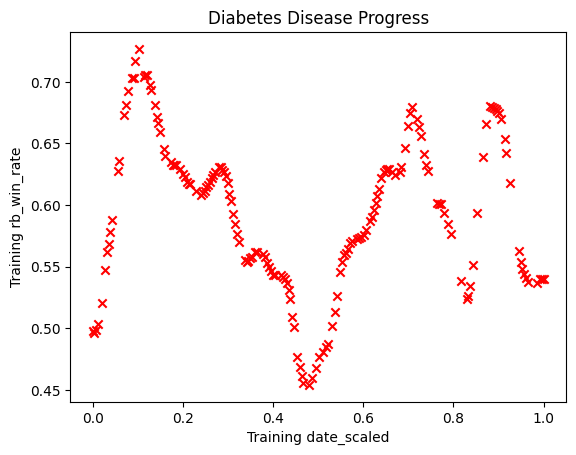

In [44]:
if(len(x_name) == 1):
    plt.scatter(x, y, marker='x', c='r')
    plt.title("Diabetes Disease Progress")
    plt.ylabel(f'Training {y_name}')
    plt.xlabel(f'Training {x_name[0]}')
else:
    fig,ax=plt.subplots(1,len(x_name),figsize=(12,3))
    for i in range(len(ax)):
        ax[i].scatter(x[:,i],y, label = 'target')
        ax[i].set_xlabel(x_name[i])
    ax[0].set_ylabel("Target"); ax[0].legend();
    fig.suptitle("winrate based on date scaled")
plt.show()

In [45]:
poly = PolynomialFeatures(degree=5, include_bias=False)
poly_features = poly.fit_transform(x)

# Create the model
my_model = LinearRegression()
# Fit the model to the data
my_model.fit(poly_features, y)

plt.show()

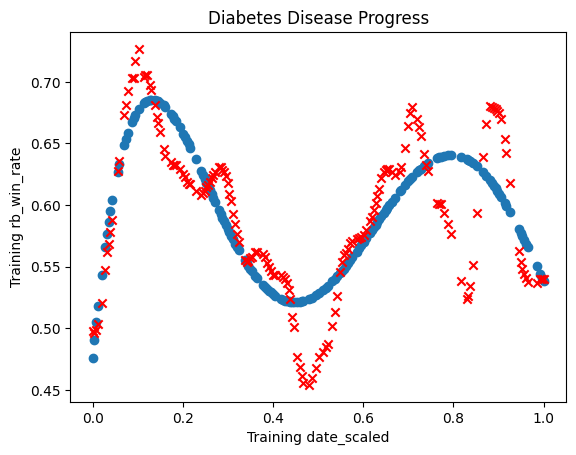

In [46]:
y_pred = my_model.predict(poly_features)
if(len(x_name) == 1):
    plt.scatter(x, y_pred)
    plt.scatter(x, y, marker='x', c='r')
    plt.title("Diabetes Disease Progress")
    plt.ylabel(f'Training {y_name}')
    plt.xlabel(f'Training {x_name[0]}')
else:
    fig,ax=plt.subplots(1,len(x_name),figsize=(12,3),sharey=True)
    for i in range(len(ax)):
        ax[i].scatter(x[:,i],y, label = 'target')
        ax[i].set_xlabel(x_name[i])
        ax[i].scatter(x[:,i],y_pred,color="orange", label = 'predict')
    ax[0].set_ylabel("Target"); ax[0].legend();
    fig.suptitle("Diabetes Disease Progress")
plt.show()

In [48]:
# save the model to disk
filename = 'my_saved_model_v3.sav'
pickle.dump(my_model, open('../Model Testing and Validation' + filename, 'wb'))